# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

### This study examined the response of tumors, in ten groups of mice, to nine drugs (one mouse group receiveing a placebo treatment). The mice were about evenly divided by gender. 

### Approximately 175 data points were collected for six drug regimens plus the the placebo (Ketapril, Naftisol, Zoniferol, Stelasyn, Ceftamin, and Infubinol). One treatment is represented by only about 150 data points (Proprivia), and two by about 225 data points (Capomulin and Ramicane). For all drug regimens the data clusters well; only one outlier occurs in one treatment group (Infubinol)

### Two drugs stand out as measuered by tumor volume: Capomulin and Ramicane. In both cases mean tumor volumn is low and the dispersion of data is small as measure by standard deviation. Capomulin was selected for further analysis.

### There is strong, positive correlation between mouse wight and tumor size (R-squared = 0.71) in the Capomulin treatment group. The tracjectory of tumor volumn across the experiment shows a regular downward trend for the one mouse examined (Mouse 793). 

In [702]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)
print(f"study_results_df shape {study_results_df.shape}")
# Display the data table for preview


study_results_df shape (1893, 4)


In [508]:
print(f"mouse_metadata_df shape {mouse_metadata_df.shape}")

mouse_metadata_df shape (249, 5)


In [510]:
print(f"study_results_df.columns: {study_results_df.columns}")

study_results_df.columns: Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [512]:
print(f"mouse_metadata_df.columns: {mouse_metadata_df.columns}")

mouse_metadata_df.columns: Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')


In [514]:
outer_join_df = pd.merge(study_results_df, mouse_metadata_df, on="Mouse ID", how="outer")
outer_join_df.shape

(1893, 8)

In [516]:
# Checking the number of mice.
print(f"unique mice: {len(outer_join_df["Mouse ID"].unique())}")

unique mice: 249


In [518]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dups_id_time_bool = outer_join_df.duplicated(["Mouse ID", "Timepoint"])
duplicated_IDs = outer_join_df[dups_id_time_bool.values]["Mouse ID"]
duplicated_IDs

587    g989
589    g989
591    g989
593    g989
595    g989
Name: Mouse ID, dtype: object

In [520]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_df = outer_join_df[dups_id_time_bool.values]
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
587,g989,0,45.000000,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


 ## Combined, single dataframe for mouse and study data

In [544]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dups_id_time_df = outer_join_df.drop_duplicates(["Mouse ID", "Timepoint"])
no_dups_id_time_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
5,a203,25,56.793208,1,Infubinol,Female,20,23
6,a203,30,59.523197,1,Infubinol,Female,20,23
7,a203,35,61.931650,2,Infubinol,Female,20,23
8,a203,40,63.593490,2,Infubinol,Female,20,23
9,a203,45,67.973419,2,Infubinol,Female,20,23


In [546]:
no_dups_id_time_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [548]:
# Checking the number of mice in the clean DataFrame.
print(f"unique mice: {len(no_dups_id_time_df["Mouse ID"].unique())}") 
# should be 248 ? NO check in excel. 249 unique

unique mice: 249


In [550]:
mice_gender_df = no_dups_id_time_df[["Mouse ID", "Sex"]]
mice_gender_df

,Mouse ID,Sex
0,a203,Female
1,a203,Female
2,a203,Female
3,a203,Female
4,a203,Female
...,...,...
1888,z969,Male
1889,z969,Male
1890,z969,Male
1891,z969,Male


## Summary Statistics

In [553]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume =  no_dups_id_time_df["Tumor Volume (mm3)"].mean()
print(f"Mean tumor volume: {mean_tumor_volume}")

Mean tumor volume: 50.44927645413136


In [555]:
median_tumor_volume = no_dups_id_time_df["Tumor Volume (mm3)"].median()
print(f"Median tumor volume: {median_tumor_volume}")

Median tumor volume: 48.951421075


In [557]:
variance_tumor_volume = no_dups_id_time_df["Tumor Volume (mm3)"].var()
print(f"Variance tumor volume: {variance_tumor_volume}")

Variance tumor volume: 79.29127745388115


In [559]:
standard_deviation_tumor_volume = no_dups_id_time_df["Tumor Volume (mm3)"].std()
print(f"Standard Deviation tumor volume: {standard_deviation_tumor_volume}")

Standard Deviation tumor volume: 8.904564978362567


In [566]:
sem_tumor_volume = no_dups_id_time_df["Tumor Volume (mm3)"].sem()
print(f"Standard Error of the Mean tumor volume: {sem_tumor_volume}")

Standard Error of the Mean tumor volume: 0.2049329125626728


In [568]:
tumor_vol_stat_dict = {
    "Mean tumor volume": mean_tumor_volume,
    "Median tumor volume": median_tumor_volume,
    "Variance tumor volume": variance_tumor_volume,
    "Standard Deviation tumor volume": standard_deviation_tumor_volume,
    "SEM Tumor Volume": [sem_tumor_volume]}
tumor_vol_stat_dict
tumor_vol_stat_df = pd.DataFrame(tumor_vol_stat_dict)
tumor_vol_stat_df

,Mean tumor volume,Median tumor volume,Variance tumor volume,Standard Deviation tumor volume,SEM Tumor Volume
0,50.449276,48.951421,79.291277,8.904565,0.204933


## Summary Statistics For Each Drug

In [428]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
groupby_drug = no_dups_id_time_df["Tumor Volume (mm3)"].groupby(no_dups_id_time_df["Drug Regimen"])
groupby_drug_mean = groupby_drug.mean()
groupby_drug_median = groupby_drug.median()
groupby_drug_variance = groupby_drug.var()
groupby_drug_std = groupby_drug.std()
groupby_drug_sem = groupby_drug.sem()

groupby_drug_mean_df = groupby_drug_mean.reset_index()
groupby_drug_median_df = groupby_drug_median.reset_index()
groupby_drug_variance_df = groupby_drug_variance.reset_index()
groupby_drug_std_df = groupby_drug_std.reset_index()
groupby_drug_sem_df = groupby_drug_sem.reset_index()

groupby_drug_mean_df = groupby_drug_mean_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Mean"})   
groupby_drug_median_df = groupby_drug_median_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Median"})
groupby_drug_variance_df = groupby_drug_variance_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
groupby_drug_std_df = groupby_drug_std_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume STD"})
groupby_drug_sem_df = groupby_drug_sem_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume SEM"})                                           

tumor_size_by_drug_treatment_stats = pd.merge(groupby_drug_mean_df, groupby_drug_median_df, on="Drug Regimen")
#tumor_size_by_drug_treatment_stats
tumor_size_by_drug_treatment_stats = pd.merge(tumor_size_by_drug_treatment_stats, groupby_drug_variance_df, on="Drug Regimen")
#tumor_size_by_drug_treatment_stats
tumor_size_by_drug_treatment_stats = pd.merge(tumor_size_by_drug_treatment_stats, groupby_drug_std_df, on="Drug Regimen")
#tumor_size_by_drug_treatment_stats
tumor_size_by_drug_treatment_stats = pd.merge(tumor_size_by_drug_treatment_stats, groupby_drug_sem_df, on="Drug Regimen")
#tumor_size_by_drug_treatment_stats
tumor_size_by_drug_treatment_stats

,Drug Regimen,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [148]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#tumor_size_by_drug_treatment_stats_oneline = groupby_drug.agg(["mean", "median", "var", "std", "sem"])
#tumor_size_by_drug_treatment_stats_oneline 

tumor_size_by_drug_treatment_stats_oneline = no_dups_id_time_df["Tumor Volume (mm3)"].groupby(no_dups_id_time_df["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])
tumor_size_by_drug_treatment_stats_oneline                                                                                             

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

## Data Measurements by Drug Regimen

In [151]:
# use groupby_drug object to count instances for each group (drug regimen)
drug_reg_count = pd.Series(groupby_drug.count())
drug_reg_count_sorted = drug_reg_count.sort_values(ascending=False)
drug_reg_count_sorted

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Tumor Volume (mm3), dtype: int64

Text(0.5, 1.0, 'Observed Timepoints by Drug')

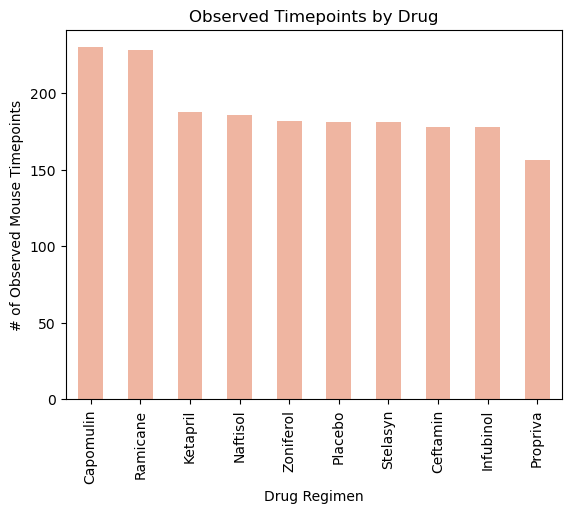

In [153]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
fig = plt.figure()
ax = fig.add_subplot()
drug_reg_count_sorted.plot.bar(ax, color = "#E9967A", alpha=0.7)
#ax = drug_reg_count_sorted.plot('bar',color = "#E9967A", alpha=0.7)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")
ax.set_title("Observed Timepoints by Drug")
#ax.set.title("Observed Timepoints By Drug")

In [155]:
type(drug_reg_count_sorted)

pandas.core.series.Series

In [157]:
observed_time_points = drug_reg_count_sorted.to_list()
observed_time_points

[230, 228, 188, 186, 182, 181, 181, 178, 178, 156]

In [159]:
drug_names = drug_reg_count_sorted.index
drug_names

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object', name='Drug Regimen')

In [161]:
#col_0 = drug_reg_count_sorted["Drug Regimen"]
tmp=drug_reg_count_sorted.get(["0"])
print(tmp)

None


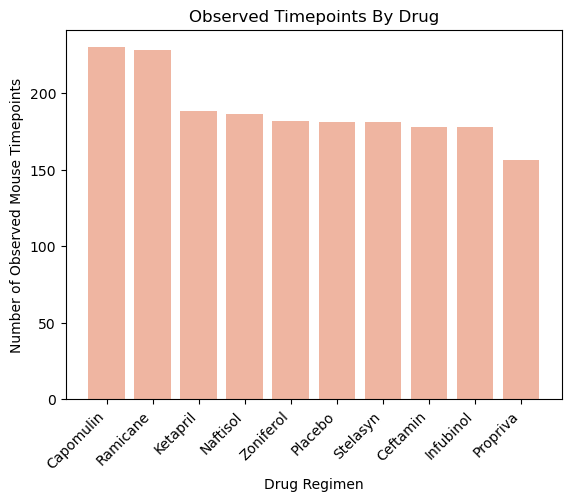

In [725]:
plt.bar(drug_names, observed_time_points, color = "#E9967A", alpha=0.7)
plt.title("Observed Timepoints By Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation=45, ha='right')
plt.show()

In [165]:
type(no_dups_id_time_df)

pandas.core.frame.DataFrame

In [167]:
no_dups_id_time_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [727]:
# Get the unique mice with their gender
mice_with_gender_df = no_dups_id_time_df[["Mouse ID", "Sex"]]
mice_with_gender_df.head()

,Mouse ID,Sex
0,a203,Female
1,a203,Female
2,a203,Female
3,a203,Female
4,a203,Female


## Ubique Mice with Gender

In [731]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender_df = no_dups_id_time_df[["Mouse ID", "Sex"]]
unique_mice_gender_df = mice_gender_df.drop_duplicates(subset='Mouse ID')
unique_mice_gender_df

,Mouse ID,Sex
0,a203,Female
10,a251,Female
20,a262,Female
30,a275,Female
40,a366,Female
...,...,...
1850,z435,Female
1853,z578,Male
1863,z581,Female
1873,z795,Female


In [573]:
gender_count = unique_mice_gender_df.groupby("Sex").size().sort_values(ascending=False) 
gender_count

Sex
Male      125
Female    124
dtype: int64

Text(0.5, 1.0, 'Gender Profile of Experimental Mouse Population')

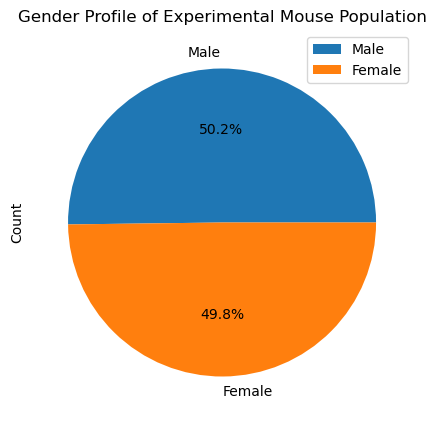

In [575]:
# Make the pie chart
gender_count_df = pd.DataFrame(gender_count)
gender_count_df
gender_count_df.columns = ['Count']
gender_count_df
gender_count_df.plot.pie(y='Count', autopct='%1.1f%%', figsize=(5, 5))
plt.title('Gender Profile of Experimental Mouse Population')

## Quartiles, Outliers and Boxplots

In [578]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mice_tumor_vol = no_dups_id_time_df.groupby("Mouse ID")["Tumor Volume (mm3)"].unique()
mice_tumor_vol_df = pd.DataFrame(mice_tumor_vol)
mice_tumor_vol_df["Final"] = [ vol_list[-1] for vol_list in mice_tumor_vol_df['Tumor Volume (mm3)']]
#mice_final_tumor_vol_df = mice_tumor_vol_df["Final"]
mice_tumor_vol_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Tumor Volume (mm3),Final
Mouse ID,,
a203,"[45.0, 48.5084684, 51.8524372, 52.7778705, 55....",67.973419
a251,"[45.0, 46.98212719, 48.59117901, 50.53445603, ...",65.525743
a262,"[45.0, 48.71756819, 49.59518129, 53.82797367, ...",70.717621
a275,"[45.0, 46.79525728, 47.37134328, 49.73440359, ...",62.999356
a366,"[45.0, 48.95136773, 53.52399007, 55.26558163, ...",63.440686
...,...,...
z435,"[45.0, 47.11597963, 48.71066147]",48.710661
z578,"[45.0, 42.18878662, 42.95211843, 38.68851607, ...",30.638696
z581,"[45.0, 49.27309187, 50.47875016, 51.1963042, 5...",62.754451


In [580]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

mask =  no_dups_id_time_df["Drug Regimen"].isin(treatments)

no_dups_id_reduced_df = no_dups_id_time_df[mask]
no_dups_id_reduced_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1868,z581,25,54.316407,2,Infubinol,Female,24,25
1869,z581,30,56.286750,2,Infubinol,Female,24,25
1870,z581,35,58.628399,3,Infubinol,Female,24,25
1871,z581,40,60.053740,3,Infubinol,Female,24,25


In [582]:
#mice_drug_df = pd.DataFrame(no_dups_id_reduced_df.groupby("Mouse ID")["Drug Regimen"].unique())n <- returns numpy arry casuing problems
mice_drug_df = no_dups_id_reduced_df.drop_duplicates(subset=["Mouse ID"])
mice_drug_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [584]:
mice_drug_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.0,0,Infubinol,Female,20,23
10,a251,0,45.0,0,Infubinol,Female,21,25
30,a275,0,45.0,0,Ceftamin,Female,20,28
57,a411,0,45.0,0,Ramicane,Male,3,22
67,a444,0,45.0,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
1816,y769,0,45.0,0,Ceftamin,Female,6,27
1826,y793,0,45.0,0,Capomulin,Male,17,17
1836,y865,0,45.0,0,Ceftamin,Male,23,26
1853,z578,0,45.0,0,Ramicane,Male,11,16


## Final Tumor Volume for Each Mouse For Each Drug Regimen

In [586]:
tumor_result_df = pd.merge(mice_drug_df, mice_tumor_vol_df, on="Mouse ID", how="inner")
tumor_result_df = tumor_result_df[['Drug Regimen','Final']]
tumor_result_df["Drug Regimen"] = pd.Series(tumor_result_df["Drug Regimen"], dtype="string")
tumor_result_df                                 

,Drug Regimen,Final
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,38.407618
4,Ramicane,43.047543
...,...,...
95,Ceftamin,68.594745
96,Capomulin,31.896238
97,Ceftamin,64.729837
98,Ramicane,30.638696


In [588]:


# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
tumor_result_Capomulin_df = tumor_result_df[tumor_result_df["Drug Regimen"] == 'Capomulin']
tumor_result_Ramicane_df =  tumor_result_df[tumor_result_df["Drug Regimen"] == 'Ramicane']
tumor_result_Infubinol_df =  tumor_result_df[tumor_result_df["Drug Regimen"] == 'Infubinol']
tumor_result_Ceftamin_df =  tumor_result_df[tumor_result_df["Drug Regimen"] == 'Ceftamin']
tumor_result_Capomulin_df.head()
# Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


,Drug Regimen,Final
9,Capomulin,38.982878
12,Capomulin,38.939633
24,Capomulin,30.485985
25,Capomulin,37.074024
26,Capomulin,40.159220


In [590]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# IQR = 75% - 25%
tumor_result_Capomulin_df.describe()
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


,Final
count,25.000000
mean,36.667568
std,5.715188
min,23.343598
25%,32.377357
50%,38.125164
75%,40.159220
max,47.685963


In [592]:
capomulin_IQR = 40.159220 - 32.377357
print(f"capomulin_IQR: {capomulin_IQR}")

capomulin_IQR: 7.781862999999994


In [594]:
outlier_range_capomulin = [(32.377357 - 1.5 * (7.781862999999994)), (40.159220 + 1.5 * (7.781862999999994))]
outlier_range_capomulin

[20.704562500000012, 51.832014499999985]

In [785]:
tumor_result_capomulin_sorted = tumor_result_Capomulin_df.sort_values(by="Final", ascending = True)
tumor_result_capomulin_sorted.head()

,Drug Regimen,Final
70,Capomulin,23.343598
51,Capomulin,28.430964
90,Capomulin,28.484033
24,Capomulin,30.485985
78,Capomulin,31.023923


In [829]:
tumor_result_capomulin_sorted_tmp = tumor_result_capomulin_sorted.reset_index()

In [831]:
tumor_result_capomulin_sorted_tmp.tail()

,index,Drug Regimen,Final
20,72,Capomulin,40.728578
21,45,Capomulin,41.483008
22,68,Capomulin,41.581521
23,64,Capomulin,46.539206
24,32,Capomulin,47.685963


In [833]:
capomulin_outliers = []
for mouse, value in zip(tumor_result_capomulin_sorted_tmp["index"], tumor_result_capomulin_sorted_tmp["Final"]):
    if value < outlier_range_capomulin[0] or value > outlier_range_capomulin[1]:
        capomulin_outliers.append([mouse, value])

#[capomulin_outliers.append([index, value]) for mouse, tumor in tumor_result_capomulin_sorted["Final"] if value < outlier_range_capomulin[0] or value > outlier_range_capomulin[1]]
if len(capomulin_outliers) == 0:
    capomulin_outliers.append(['none','none'])

In [835]:
tumor_result_Ramicane_df.describe()

,Final
count,25.000000
mean,36.191390
std,5.671539
min,22.050126
25%,31.560470
50%,36.561652
75%,40.659006
max,45.220869


In [837]:
ramicane_IQR = 40.659006 - 31.560470
print(f"ramicane_IQR: {ramicane_IQR}")

ramicane_IQR: 9.098536


In [839]:
outlier_range_ramicane = [(31.560470 - 1.5 * (9.098536)), (40.659006 + 1.5 * (9.098536))]
outlier_range_ramicane

[17.912666, 54.30681]

In [841]:
tumor_result_ramicane_sorted = tumor_result_Ramicane_df.sort_values(by="Final", ascending = True)
tumor_result_ramicane_sorted.head()

,Drug Regimen,Final
40,Ramicane,22.050126
27,Ramicane,29.128472
71,Ramicane,30.276232
50,Ramicane,30.564625
98,Ramicane,30.638696


In [843]:
tumor_result_ramicane_sorted_tmp = tumor_result_ramicane_sorted.reset_index()

In [845]:
tumor_result_ramicane_sorted_tmp.tail()

,index,Drug Regimen,Final
20,4,Ramicane,43.047543
21,87,Ramicane,43.166373
22,67,Ramicane,43.419381
23,94,Ramicane,44.183451
24,62,Ramicane,45.220869


In [847]:
ramicane_outliers = []

for mouse, value in zip(tumor_result_ramicane_sorted_tmp["index"], tumor_result_ramicane_sorted_tmp["Final"]):
    if value < outlier_range_ramicane[0] or value > outlier_range_ramicane[1]:
        ramicane_outliers.append([mouse, value])
        
if len(ramicane_outliers) == 0:
    ramicane_outliers.append(['none','none'])

In [849]:
tumor_result_Infubinol_df.describe()

,Final
count,25.000000
mean,58.178246
std,8.602957
min,36.321346
25%,54.048608
50%,60.165180
75%,65.525743
max,72.226731


In [851]:
infubinol_IQR = 65.525743 - 54.048608
print(f"infubinol_IQR: {infubinol_IQR}")

infubinol_IQR: 11.477135000000004


In [853]:
outlier_range_infubinol = [(54.048608 - 1.5 * (11.477135000000004)), (65.525743 + 1.5 * (11.477135000000004))]
outlier_range_infubinol

[36.832905499999995, 82.74144550000001]

In [855]:
tumor_result_infubinol_sorted = tumor_result_Infubinol_df.sort_values(by="Final", ascending = True)
tumor_result_infubinol_sorted.head()

,Drug Regimen,Final
15,Infubinol,36.321346
58,Infubinol,45.699331
79,Infubinol,46.250112
52,Infubinol,47.010364
85,Infubinol,50.005138


In [857]:
tumor_result_infubinol_sorted_tmp = tumor_result_infubinol_sorted.reset_index()

In [859]:
tumor_result_infubinol_sorted_tmp.tail()

,index,Drug Regimen,Final
20,41,Infubinol,66.196912
21,31,Infubinol,67.289621
22,93,Infubinol,67.685569
23,0,Infubinol,67.973419
24,14,Infubinol,72.226731


In [861]:
infubinol_outliers = []

for mouse, value in zip(tumor_result_infubinol_sorted_tmp["index"], tumor_result_infubinol_sorted_tmp["Final"]):
    if value < outlier_range_infubinol[0] or value > outlier_range_infubinol[1]:
        infubinol_outliers.append([mouse, value])
        
if len(infubinol_outliers) == 0:
    infubinol_outliers.append(['none','none'])

In [863]:
tumor_result_Ceftamin_df.describe()

,Final
count,25.000000
mean,57.753977
std,8.365568
min,45.000000
25%,48.722078
50%,59.851956
75%,64.299830
max,68.923185


In [865]:
ceftamin_IQR = 64.299830 - 48.722078
print(f"ceftamin_IQR: {ceftamin_IQR}")

ceftamin_IQR: 15.577751999999997


In [867]:
outlier_range_ceftamin = [(48.722078 - 1.5 * (15.577751999999997)), (64.299830 + 1.5 * (15.577751999999997))]
outlier_range_ceftamin

[25.35545000000001, 87.66645799999999]

In [869]:
tumor_result_ceftamin_sorted = tumor_result_Ceftamin_df.sort_values(by="Final", ascending = True)
tumor_result_ceftamin_sorted.head()

,Drug Regimen,Final
89,Ceftamin,45.000000
10,Ceftamin,45.000000
76,Ceftamin,45.000000
74,Ceftamin,45.000000
46,Ceftamin,46.784535


In [871]:
tumor_result_ceftamin_sorted_tmp = tumor_result_ceftamin_sorted.reset_index()

In [873]:
tumor_result_ceftamin_sorted_tmp.tail()

,index,Drug Regimen,Final
20,97,Ceftamin,64.729837
21,84,Ceftamin,67.527482
22,43,Ceftamin,67.748662
23,95,Ceftamin,68.594745
24,39,Ceftamin,68.923185


In [875]:
ceftamin_outliers = []

for mouse, value in zip(tumor_result_ceftamin_sorted_tmp["index"], tumor_result_ceftamin_sorted_tmp["Final"]):
    if value < outlier_range_ceftamin[0] or value > outlier_range_ceftamin[1]:
        ceftamin_outliers.append([mouse, value])
        
if len(ceftamin_outliers) == 0:
    ceftamin_outliers.append(['none','none'])

## Outlier Summary

In [896]:
print(f"Capomuilin outliers:")
for sublist in capomulin_outliers:
    mouse = sublist[0]
    tumor = sublist[1]
    print(f"\t mouse id: {mouse},\t tumor volume: {tumor}")

print(f"Ramicane outliers:")
for sublist in ramicane_outliers:
    mouse = sublist[0]
    tumor = sublist[1]
    print(f"\t mouse id: {mouse},\t tumor volume: {tumor}")  

print(f"Infubinol outliers:")
for sublist in infubinol_outliers:
    mouse = sublist[0]
    tumor = sublist[1]
    print(f"\t mouse id: {mouse},\t tumor volume: {tumor}")

print(f"Ceftamin outliers:") 
for sublist in ceftamin_outliers:
    mouse = sublist[0]
    tumor = sublist[1]
    print(f"\t mouse id: {mouse},\t tumor volume: {tumor}")

Capomuilin outliers:
	 mouse id: none,	 tumor volume: none
Ramicane outliers:
	 mouse id: none,	 tumor volume: none
Infubinol outliers:
	 mouse id: 15,	 tumor volume: 36.3213458
Ceftamin outliers:
	 mouse id: none,	 tumor volume: none


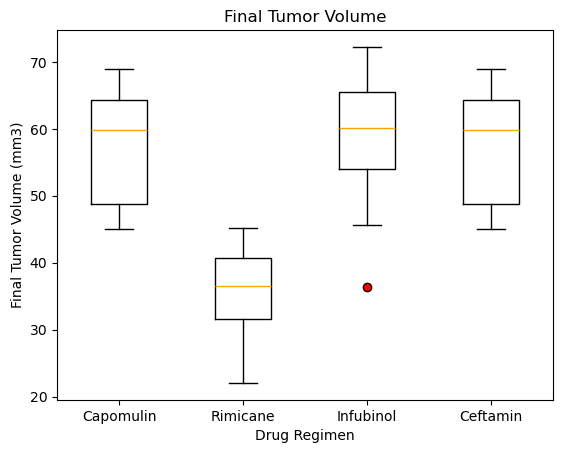

In [898]:
a_adict = {"Capomulin":tumor_result_ceftamin_sorted["Final"] ,"Rimicane":tumor_result_ramicane_sorted["Final"] , "Infubinol": tumor_result_infubinol_sorted["Final"], "Ceftamin": tumor_result_ceftamin_sorted["Final"]}
data_for_boxplot_df = pd.DataFrame(a_adict)

data_for_boxplot_df.boxplot(whiskerprops=dict(color="black"), flierprops=dict(markerfacecolor='red'),boxprops=dict(color="black"), medianprops = dict(color="orange"))
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume')
plt.grid(alpha=0.0)
plt.show()

## Line and Scatter Plots

In [901]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mask = no_dups_id_reduced_df["Mouse ID"] == 'y793'
mouse_y793_df = no_dups_id_reduced_df[mask]
mouse_y793_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1826,y793,0,45.000000,0,Capomulin,Male,17,17
1827,y793,5,41.019913,0,Capomulin,Male,17,17
1828,y793,10,41.630010,1,Capomulin,Male,17,17
1829,y793,15,42.283665,1,Capomulin,Male,17,17
1830,y793,20,40.716428,2,Capomulin,Male,17,17
1831,y793,25,38.992734,2,Capomulin,Male,17,17
1832,y793,30,35.726023,2,Capomulin,Male,17,17
1833,y793,35,36.327870,2,Capomulin,Male,17,17
1834,y793,40,31.475411,2,Capomulin,Male,17,17
1835,y793,45,31.896238,2,Capomulin,Male,17,17


Text(0, 0.5, 'Tumor Volume (mm3)')

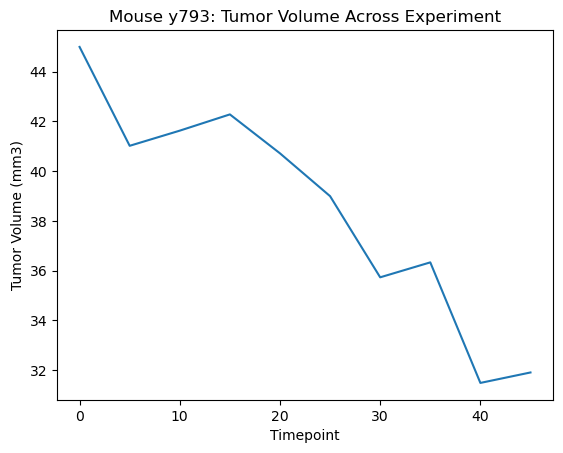

In [977]:
time = mouse_y793_df["Timepoint"]
tumor_vol_y793 = mouse_y793_df["Tumor Volume (mm3)"]
plt.plot(time, tumor_vol_y793)
plt.title("Mouse y793: Tumor Volume Across Experiment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


In [656]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mask = no_dups_id_reduced_df["Drug Regimen"] == 'Capomulin'
capomulin_df = no_dups_id_reduced_df[mask]
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
174,b128,0,45.000000,0,Capomulin,Female,9,22
175,b128,5,45.651331,0,Capomulin,Female,9,22
176,b128,10,43.270852,0,Capomulin,Female,9,22
177,b128,15,43.784893,0,Capomulin,Female,9,22
178,b128,20,42.731552,0,Capomulin,Female,9,22


In [680]:
#capomulin_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_weight_tumor = capomulin_df[["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]
capomulin_weight_tumor

,Mouse ID,Tumor Volume (mm3),Weight (g)
174,b128,45.000000,22
175,b128,45.651331,22
176,b128,43.270852,22
177,b128,43.784893,22
178,b128,42.731552,22
...,...,...,...
1831,y793,38.992734,17
1832,y793,35.726023,17
1833,y793,36.327870,17
1834,y793,31.475411,17


In [967]:
capomulin_for_scatter = capomulin_weight_tumor.groupby(['Mouse ID',"Weight (g)"])['Tumor Volume (mm3)'].mean().reset_index()
capomulin_for_scatter_df = pd.DataFrame(capomulin_for_scatter)
capomulin_for_scatter_df = capomulin_for_scatter_df.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
capomulin_for_scatter_df.head()
#capomulin_for_scatter_df.plot.scatter(c='DarkBlue')

,Mouse ID,Weight (g),Average Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


Text(0.5, 1.0, 'Capomulin Treament, Mouse Weight versus Average Tumor Volume')

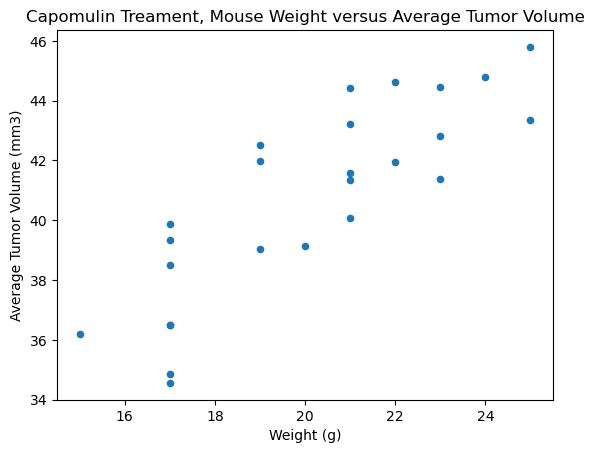

In [971]:
capomulin_for_scatter_df.plot.scatter(x='Weight (g)',y='Average Tumor Volume (mm3)')
plt.title("Capomulin Treament, Mouse Weight versus Average Tumor Volume")

## Correlation and Regression

In [905]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The r-squared value is: 0.71


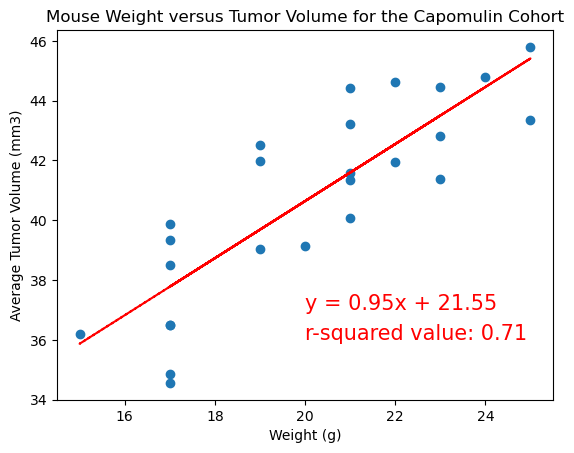

In [975]:
weight = capomulin_for_scatter_df["Weight (g)"]
volume = capomulin_for_scatter_df["Average Tumor Volume (mm3)"]
slope, intercept, r_val, p_val, std_error = st.linregress(weight, volume)
fit = slope * weight + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = round(r_val ** 2,2)
r2 = "r-squared value: " + str(r_squared)
plt.scatter(weight, volume)
plt.plot(weight,fit,"r--")
plt.annotate(line_eq,(20, 37),fontsize=15,color="red")
plt.annotate(r2,(20, 36),fontsize=15,color="red")
plt.title("Mouse Weight versus Tumor Volume for the Capomulin Cohort")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared value is: {round(r_val ** 2,2)}")
plt.show()
#pe_plt.scatter(year,petrol_electric_cars)
